<!--NAVIGATION-->
< [Algorithms and Inference](01.01.Algorithms-and-Inference.ipynb) | [Conteúdo](Index.ipynb) | [Bayesian Inference] >

<a href="https://colab.research.google.com/github/fmafonseca/casi/blob/master/notebooks/01.02.Frequentist-Inference.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# 2 Frequentist Inference

### Glomerular Filtration data of Table 2.1 and elsewhere

Os dados utilizados aqui são os disponibilizados no próprio site do livro através da URL https://web.stanford.edu/~hastie/CASI/data.html.

Dados:
- *Measurements of glomerular filtration rate for 211 kidney patients from the Nephrology laboratory of Dr Bryan Myers at Stanford University.*
- https://web.stanford.edu/~hastie/CASI_files/DATA/gfr.txt

In [1]:
import pandas as pd

gfr_df = pd.read_csv("data/gfr.txt", delimiter=' ', header=None)
gfr_df.columns = ['glr'] # rename column to 'glr'
gfr_df.head()

,glr
0,108
1,91
2,62
3,59
4,84


Esta seção se refere ao exemplo abaixo do livro:

<blockquote>
<em>We begin with another example from Dr. Myers’ nephrology laboratory: $211$ kidney patients have had their glomerular filtration rates measured, with the results shown in Figure 2.1; <strong><font color=green>gfr</font></strong> is an important indicator of kidney function, with low values suggesting trouble. (It is a key component of <strong><font color=green>tot</font></strong> in Figure 1.1). The mean and standard error (1.1)–(1.2) are $\bar{x}=54.25$ and $\hat{se}=0.95$, typically reported as</em>

<p>
 $$
54.25 \pm 0.95
$$
</p>

<p>
$\pm 0.95$ <em>denotes a <mark>frequentist inference</mark> for the accuracy of the estimate $\bar{x}=54.25$, and <mark>suggests that we shouldn’t take the “$.25$” very seriously, even the “$4$” being open to doubt.</mark></em>
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

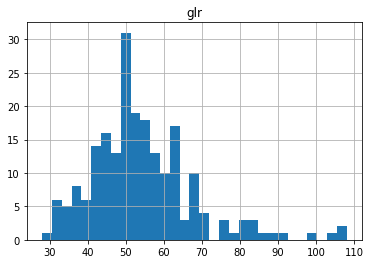

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Figure 2.1 Glomerular filtration rates for 211 kidney patients
figure_2_1 = gfr_df.hist(column='glr', bins=31)

In [3]:
import numpy as np

n = len(gfr_df.index)
mean_glr = gfr_df.glr.mean()
estimated_se_mean_glr = gfr_df.glr.std() / np.sqrt(n)

print("Number of glr measurements = {0}".format(n))
print("Mean of glr measurements = {0:.2f}".format(mean_glr))
print("Estimated standard error for mean of glr measurements = {0:.2f}".format(estimated_se_mean_glr))

Number of glr measurements = 211
Mean of glr measurements = 54.27
Estimated standard error for mean of glr measurements = 0.94


É possível perceber que os números calculados aqui a partir do *[data set](https://web.stanford.edu/~hastie/CASI_files/DATA/gfr.txt)* disponibilizado no site do livro estão ligeiramente diferentes do livro, ou seja, $\bar{x}=54.27$ ao invés de $\bar{x}=54.25$ e $\hat{se}=0.94$ ao invés de $\hat{se}=0.95$. Porém, isto não invalida o exemplo.

Mas de onde vem esta **inferência frequentista** $\hat{se}$ a respeito da acurácia da estimativa $\bar{x}$?

<blockquote>
<mark>Statistical inference usually begins with the assumption that some probability model has produced the observed data</mark> $x$, in our case the vector of $n=211$ <strong><font color=green>gfr</font></strong> measurements $x = \left( x_1, x_2, \ldots, x_n \right)$. Let $X = \left( X_1, X_2, \ldots, X_n \right)$ indicate $n$ independent draws from a probability distribution $F$, written

<p>
$$
F \rightarrow X
$$
</p>

<p>
$F$ being the underlying distribution of possible <strong><font color=green>gfr</font></strong> scores here. A realization $X=x$ of $F \rightarrow X$ has been observed, and the statistician wishes to <mark><em>infer</em></mark> some property of the unknown distribution $F$.
</p>

<p>
Suppose the desired property is the <em>expectation</em> of a single random draw $X$ from $F$, denoted
</p>

<p>
$$
\theta = E_F \{ X \}
$$
</p>

<p>
The obvious estimate of $\theta$ is $\hat{\theta}=\bar{x}$, the sample average. If $n$ were enormous, say $10^{10}$, we would expect $\hat{\theta}$ to nearly equal $\theta$, but otherwise there is room for error. <mark>How much error is the inferential question</mark>.
</p>

<p>
The estimate $\hat{\theta}$ is calculated from $x$ according to some known algorithm, say
</p>

<p>
$$
\hat{\theta} = t \left( x \right) \text{,}
$$
</p>

<p>
$t \left( x \right)$ in our example being the averaging function $\bar{x} = \sum_{i=1}^n \frac{x_i}{n}$; $\hat{\theta}$ is a realization of
</p>

<p>
$$
\hat{\Theta} = t \left( X \right) \text{,}
$$
</p>

<p>
the output of $t \left( . \right)$ applied to a theoretical sample $X$ from $F$. We have chosen $t \left( X \right)$, we hope, to make‚ $\hat{\Theta}$ a good estimator of $\theta$, the desired property of $F$.
</p>

<p>
We can now give a <font color=magenta>first definition of frequentist inference</font>: <mark><em>the accuracy of an observed estimate $\hat{\theta} = t \left( x \right)$ is the probabilistic accuracy of $\hat{\Theta} = t \left( X \right)$ as an estimator of $\theta$</em></mark>. This may seem more a tautology than a definition, but it contains a powerful idea: <mark>$\hat{\theta}$ is just a single number but $\hat{\Theta}$ takes on a range of values whose spread can define measures of accuracy</mark>.
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

Então, no exemplo do livro temos até o momento que:
- $F$ é a distribuição de possíveis valores de **<font color=green>gfr</font>**, ou seja, é o modelo probabilístico que gerou as $n=211$ observações $x = \left( x_1, x_2, \ldots, x_n \right)$ de valores de **<font color=green>gfr</font>**.
- Estamos interessados em descobrir o valor esperado (*expectation*) de um único sorteio aleatório $X$ a partir de $F$, ou seja, queremos saber qual o valor de $\theta = E_F \{ X \}$. Mas não temos $F$.
- Uma estimativa para $\theta$ é $\hat{\theta}$, ou seja, $\theta \approx \hat{\theta} = t \left( x \right) = \bar{x} = \sum_{i=1}^n \frac{x_i}{n} = 54.27$.
- Mas dado que $\hat{\theta}$ é uma aproximação, então, qual a nossa incerteza em relação a $\hat{\theta}=54.27$?
- Da mesma forma que $x = \left( x_1, x_2, \ldots, x_n \right)$ é uma realização de $X$ (que é uma amostra teórica gerada a partir de $F$), $\hat{\theta}=t \left( x \right)=54.27$ também pode ser visto como uma realização de $\hat{\Theta}=t \left( X \right)$ (que representa os possíveis valores resultantes de $t \left( . \right)$ aplicados a possíveis amostras teóricas $X$ geradas a partir de $F$).
- Então, $\hat{\Theta}$ pode assumir um intervalo de valores cuja a variação destes valores pode definir uma medida de incerteza.
- Logo, aproveitando a primeira definição de inferência frequentista de que "<mark><em>the accuracy of an observed estimate $\hat{\theta} = t \left( x \right)$ is the probabilistic accuracy of $\hat{\Theta} = t \left( X \right)$ as an estimator of $\theta$</em></mark>", podemos utilizar a variação de $\hat{\Theta}$ como uma medida da incerteza para a nossa estimativa $\hat{\theta}=54.27$.

Mas como podemos medir esta incerteza?

<blockquote>
<mark>Bias and variance are familiar examples of frequentist inference</mark>. Define $\mu$ to be the expectation of $\hat{\Theta} = t \left( X \right)$ under model $F \rightarrow X$,

<p>
$$
\mu = E_F \{ \hat{\Theta} \} \text{.}
$$
</p>

<p>
Then the bias and variance attributed to estimate $\hat{\theta}$ of parameter $\theta$ are
</p>

<p>
$$
\text{bias} = \mu - \theta \enspace \text{ and } \enspace \text{var} = E_F \left\{ \left( \hat{\Theta} - \mu \right)^2 \right\}
$$
</p>

<p>
Again, what keeps this from tautology is the attribution to the single number $\hat{\theta}$ of the probabilistic properties of $\hat{\Theta}$ following from model $F \rightarrow X$.
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

<blockquote>
<mark>Frequentism is often defined with respect to “an infinite sequence of future trials”</mark>. We imagine hypothetical data sets $X^{(1)}, X^{(2)}, X^{(3)}, \ldots$ generated by the same mechanism as $x$ providing corresponding values $\hat{\Theta}^{(1)}, \hat{\Theta}^{(2)}, \hat{\Theta}^{(3)}, \ldots$ as in $\hat{\Theta} = t \left( X \right)$. <mark>The frequentist principle is then to attribute for $\hat{\theta}$ the accuracy properties of the ensemble of $\hat{\Theta}$ values</mark>.

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

## 2.1 Frequentism in Practice

A pergunta de antes ainda permanece, ou seja, como podemos medir, na prática, a variação de $\hat{\Theta}$ e utilizá-la como uma medida da incerteza para a nossa estimativa $\hat{\theta}=54.27$?

<blockquote>
Our working definition of frequentism is that <mark><em>the probabilistic properties of a procedure of interest are derived and then applied verbatim to the procedure’s output for the observed data</em>. This has an obvious defect: it requires calculating the properties of estimators $\hat{\Theta} = t \left( X \right)$ obtained from the true distribution $F$, even though $F$ is unknown</mark>. Practical frequentism uses a collection of more or less ingenious devices to circumvent the defect.

<p>
<strong><em>1. The plug-in principle.</em></strong> A simple formula relates the standard error of $\bar{X} = \sum_{i=1}^n \frac{X_i}{n}$ to $\text{var}_F \left( X \right)$, the variance of a single $X$ drawn from $F$,
</p>

<p>
$$
se \left( \bar{X} \right) = \left[ \frac{\text{var}_F \left( X \right)}{n} \right]^{\frac{1}{2}} \text{.} \enspace \enspace \text{(2.8)}
$$
</p>

<p>
But having observed $x = \left( x_1, x_2, \ldots, x_n \right)$ we can estimate $\text{var}_F \left( X \right)$ without bias by
</p>

<p>
$$
\hat{\text{var}}_F = \frac{\sum_{i=1}^n \left( x_i - \bar{x} \right)^2}{n-1} \text{.} \enspace \enspace \text{(2.9)}
$$
</p>

<p>
Plugging formula (2.9) into (2.8) gives $\hat{se} = \left[ \frac{\sum_{i=1}^n \left( x_i - \bar{x} \right)^2}{\left( n \left( n-1 \right) \right)} \right]^{\frac{1}{2}}$, the usual estimate for the standard error of an average $\bar{x}$. In other words, the frequentist accuracy estimate for $\bar{x}$ is itself estimated from the observed data.
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

Então, utilizando **(1)** a <font color=magenta>definição de inferência frequentista</font> de que "<mark><em>the accuracy of an observed estimate $\hat{\theta} = t \left( x \right)$ is the probabilistic accuracy of $\hat{\Theta} = t \left( X \right)$ as an estimator of $\theta$</em></mark>" e utilizando **(2)** o *<font color=magenta>plug-in principle</font>* temos que:
- **(1a)**: pelo Teorema Central do Limite (*Central Limit Theorem - CLT*), sob certas condições ([mais detalhes aqui](https://fmafonseca.github.io/statistical-thinking-data-science/001.teorema-central-do-limite.html)), a distribuição das <font color=blue>médias das amostras</font> (*<font color=blue>sample means</font>*) $\bar{X}$ é aproximadamente normal (*nearly normal*), centrada na <font color=orange>média da população</font> (*<font color=orange>population mean</font>*) $\mu_{pop}$, e com um <font color=blue>desvio padrão</font> (*<font color=blue>standard deviation</font>*) $SE$ igual ao <font color=orange>desvio padrão da população</font> (*<font color=orange>population standard deviation</font>*) $\sigma$ dividido pela raiz quadrada do <font color=gray>tamanho das amostras</font> (*<font color=gray>samples size</font>*) $n$.

$$
\bar{X} \sim \mathcal{N}\left(mean=\mu_{pop}, SE=\frac{\sigma}{\sqrt{n}}\right)
$$

- **(1b)**: fazendo a ligação entre o Teorema Central do Limite (*Central Limit Theorem - CLT*) e o exemplo do livro, temos que:
  - $\bar{X}$ está para $\hat{\Theta}$, assim como,
  - $\mu_{pop}$ está para $\theta = E_F \{ X \}$, assim como,
  - $SE$ está para $se \left( \bar{X} \right)$, logo, temos como propriedades probabilísticas para $\hat{\Theta}$ o seguinte:

$$
\hat{\Theta} \sim \mathcal{N}\left(mean=\theta=E_F\{X\}, \enspace SE=\frac{\sigma_F}{\sqrt{n}}=\left[ \frac{\text{var}_F \left( X \right)}{n} \right]^{\frac{1}{2}}\right)
$$

- **(1c)**: e pela <font color=magenta>definição de inferência frequentista</font>, então, podemos assumir que a incerteza da estimativa $\hat{\theta}=54.27$ será medida pelo erro padrão (*standard deviation*) $SE=\frac{\sigma_F}{\sqrt{n}}$ de $\hat{\Theta}$.

- **(2)** : e, finalmente, pelo *<font color=magenta>plug-in principle</font>* podemos estimar o desvio padrão $\sigma_F$ de $F$ através do desvio padrão $s$ do que foi observado via $x = \left( x_1, x_2, \ldots, x_n \right)$. Que é a mesma coisa do que estimar $\text{var}_F \left( X \right)$ através de $\hat{\text{var}}_F$ (equação 2.9 do livro).

É deste modo que chegamos em

$$
\hat{\theta} \pm \hat{se} \enspace \Rightarrow \enspace 54.27 \pm 0.94
$$

In [4]:
n = len(gfr_df.index)
mean_glr = gfr_df.glr.mean()
estimated_se_mean_glr = gfr_df.glr.std() / np.sqrt(n)

print("Number of glr measurements = {0}".format(n))
print("Mean of glr measurements = {0:.2f}".format(mean_glr))
print("Estimated standard error for mean of glr measurements = {0:.2f}".format(estimated_se_mean_glr))

Number of glr measurements = 211
Mean of glr measurements = 54.27
Estimated standard error for mean of glr measurements = 0.94


<blockquote>
<strong><em>4. Simulation and the bootstrap.</em></strong> <mark>Modern computation has opened up the possibility of numerically implementing the “infinite sequence of future trials” definition, except for the infinite part</mark>. An estimate $\hat{F}$ of $F$, perhaps the MLE, is found, and values $\hat{\Theta}^{(k)} = t\left( X^{(k)} \right)$ simulated from $\hat{F}$ for $k=1, 2, \ldots, B$, say $B=1000$. <mark>The empirical standard deviation of the $\hat{\Theta}$s is then the frequentist estimate of standard error for $\hat{\theta} = t \left( x \right)$</mark>, and similarly with other measures of accuracy.

<p>
This is a good description of the bootstrap, Chapter 10. (Notice that here the plugging-in, of $\hat{F}$ for $F$, comes first rather than at the end of the process.) The classical methods 1–3 above are restricted to estimates $\hat{\theta} = t \left( x \right)$ that are smoothly defined functions of various sample means. Simulation calculations remove this restriction. Table 2.1 shows three “location” estimates for the <strong><font color=green>gfr</font></strong> data, the mean, the $25\%$ Winsorized mean, and the median, along with their standard errors, the last two computed by the bootstrap. A happy feature of computer-age statistical inference is the tremendous expansion of useful and usable statistics $t \left( x \right)$ in the statistician’s working toolbox, the <strong><font color=green>lowess</font></strong> algorithm in Figures 1.2 and 1.3 providing a nice example.
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

In [5]:
%%time

from scipy.stats import mstats

winsorized_limit = 0.25

# calculates values Θ̂ (k)=t(X(k)) simulated from F̂ for k=1,2,…,B, say B=1000
#    for t(.) = the 25% Winsorized mean, and
#        t(.) = the median
glr_bootstrap_metrics_df = pd.DataFrame(columns=['replication', 'winsorized_mean', 'median'])
replicates = 1000
for rep in range(replicates):
    # "generates an estimate F̂ of F via bootstrap"
    bootstrap_idxs = np.random.choice(n, n)
    new_gfr_df = gfr_df.iloc[bootstrap_idxs]
    
    # "calculates Θ̂ (k)=t(X(k)) simulated from F̂"
    
    # for t(.) = the 25% Winsorized mean, and
    winsorized_glr = mstats.winsorize(new_gfr_df.glr, limits=[winsorized_limit, winsorized_limit])
    winsorized_mean_glr = np.mean(winsorized_glr)
    # for t(.) = the median
    median_glr = new_gfr_df.glr.median()
    
    df_row = pd.DataFrame({'replication': [rep], 'winsorized_mean': [winsorized_mean_glr], 'median': [median_glr]})
    glr_bootstrap_metrics_df = pd.concat([glr_bootstrap_metrics_df, df_row])

Wall time: 2.15 s


<blockquote>
<strong>Table 2.1</strong> <em>Three estimates of location for the <strong><font color=green>gfr</font></strong> data, and their estimated standard errors; last two standard errors using the bootstrap, $B=1000$</em>.

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

In [6]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

# 25% winsorized mean and standard error
winsorized_glr = mstats.winsorize(gfr_df.glr, limits=[winsorized_limit, winsorized_limit])
winsorized_mean_glr = np.mean(winsorized_glr)
empirical_std = bs.bootstrap(np.array(glr_bootstrap_metrics_df['winsorized_mean']), stat_func=bs_stats.std)
estimated_se_winsorized_mean_glr = empirical_std.value

# median and standard error
median_glr = gfr_df.glr.median()
empirical_std = bs.bootstrap(np.array(glr_bootstrap_metrics_df['median']), stat_func=bs_stats.std)
estimated_se_median_glr = empirical_std.value

# create Table 2.1
estimates_column = np.round([mean_glr, winsorized_mean_glr, median_glr], decimals=2)
se_column = np.round([estimated_se_mean_glr, estimated_se_winsorized_mean_glr, estimated_se_median_glr], decimals=2)
table_2_1 = pd.DataFrame(
    {'Estimate': estimates_column, 'Standard Error': se_column},
    index = ['mean', '25% winsorized mean', 'median']
)
table_2_1

,Estimate,Standard Error
mean,54.27,0.94
25% winsorized mean,52.81,0.90
median,52.00,0.86


<blockquote>
<strong><em>5. Pivotal statistics.</em></strong> <mark>A pivotal statistic $\hat{\theta} = t \left( x \right)$ is one whose distribution does not depend upon the underlying probability distribution $F$. In such a case the theoretical distribution of $\hat{\Theta} = t\left( X \right)$ applies exactly to $\hat{\theta}$, removing the need for devices 1–4 above</mark>. The classic example concerns Student’s two-sample $t$-test.

<p>
In a two-sample problem the statistician observes two sets of numbers,
</p>

<p>
$$
x_1 = \left( x_{11}, x_{12}, \ldots, x_{1n_1} \right) \enspace x_2 = \left( x_{21}, x_{22}, \ldots, x_{2n_2} \right) \text{,} \enspace \enspace \enspace \text{(2.11)}
$$
</p>

and wishes to test the <em>null hypothesis</em> that they come from the same distribution (as opposed to, say, the second set tending toward larger values than the first). It is assumed that the distribution $F_1$ for $x_1$ is <em>normal</em>, or <em>Gaussian</em>,
</p>

<p>
$$
X_{1i} \overset{ind}{\sim} \mathcal{N}\left(\mu_1, \sigma^2 \right), \enspace \enspace i=1,2,\ldots,n_1, \enspace \enspace \enspace \text{(2.12)}
$$
</p>

<p>
the notation indicating $n_1$ independent draws from a normal distribution with expectation $\mu_1$ and variance $\sigma^2$. Likewise
</p>

<p>
$$
X_{2i} \overset{ind}{\sim} \mathcal{N}\left(\mu_2, \sigma^2 \right), \enspace \enspace i=1,2,\ldots,n_2. \enspace \enspace \enspace \text{(2.13)}
$$
</p>

<p>
We wish to test the null hypothesis
</p>

<p>
$$
H_0 : \mu_1 = \mu_2. \enspace \enspace \enspace \text{(2.14)}
$$
</p>

<p>
The obvious test statistic $\hat{\theta} = \bar{x}_2 - \bar{x}_1$, the difference of the means, has distribution
</p>

<p>
$$
\hat{\theta} \sim \mathcal{N}\left(0, \sigma^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right) \right) \enspace \enspace \enspace \text{(2.15)}
$$
</p>

<p>
under $H_0$. We <mark>could plug in</mark> the unbiased estimate of $\sigma^2$,
</p>

<p>
$$
\hat{\sigma}^2 = \frac{\sum_{i=1}^{n_1} \left( x_{1i} - \bar{x}_1 \right)^2 + \sum_{i=1}^{n_2} \left( x_{2i} - \bar{x}_2 \right)^2}{n_1+n_2-2} \enspace \enspace \enspace \text{(2.16)}
$$
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

A equação **(2.15)** vem do *Lemma 6* descrito no relatório *Mathematical Justifcation of Introductory Hypothesis Tests and Development of Reference Materials* de *Jennifer L. Loveland*:

<blockquote>
<strong>LEMMA 6</strong>. <em>If $X_1,X_2,\ldots,X_n$ and $Y_1,Y_2,\ldots,Y_m$ are independent with $X_i \sim \mathcal{N}\left( \mu_X,\sigma^2 \right)$ and $Y_i \sim \mathcal{N}\left( \mu_Y,\sigma^2 \right)$ then</em>

<p>
$$
\bar{X} - \bar{Y} \sim \mathcal{N}\left( \mu_X - \mu_Y, \sigma^2 \left( \frac{1}{n} + \frac{1}{m} \right) \right)
$$
</p>

<p>
<small>(Fonte: <em>Loveland, Jennifer L., "Mathematical Justifcation of Introductory Hypothesis Tests and Development of Reference Materials" (2011). All Graduate Plan B and other Reports. 14. https://digitalcommons.usu.edu/gradreports/14</em>)</small>
</p>
</blockquote>

Continuando com a explicação de **Pivotal statistics** como um dos mecanismos para viabilizar, na prática, a **inferência frequentista** ...

<blockquote>
but Student provided a more elegant solution: instead of $\hat{\theta}$, we test $H_0$ using the two-sample $t$-statistic

<p>
$$
t = \frac{\bar{x}_2 - \bar{x}_1}{\hat{sd}} \enspace \enspace \text{where } \hat{sd} = \hat{\sigma} \left( \frac{1}{n_1} + \frac{1}{n_2} \right)^{1/2} \enspace \enspace \enspace \text{(2.17)}
$$
</p>

<p>
<mark>Under $H_0$, $t$ is pivotal, having the same distribution (Student’s $t$ distribution with $n_1 + n_2 - 2$ degrees of freedom), no matter what the value of the “nuisance parameter" $\sigma$.</mark>
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

A equação **(2.17)** e o fato de que a estatística $t$ segue uma distribuição $t$ com $n_1 + n_2 - 2$ graus de liberdade (ou seja, segue uma distribuição que não depende do parâmetro $\sigma$ e, por isto, a estatística é considerada *pivotal*) vem da *Definition 11* e do *Theorem 22* descrito no relatório *Mathematical Justifcation of Introductory Hypothesis Tests and Development of Reference Materials* de *Jennifer L. Loveland*:

<blockquote>
<strong>DEFINITION 11</strong>. <em>If $X_1,X_2,\ldots,X_n$ are random variables, let</em>

<p>
$$
\bar{X} = \frac{\sum_{i=1}^{n} X_i}{n} \enspace \enspace \text{and} \enspace \enspace S = \frac{\sum_{i=1}^{n} \left(X_i - \bar{X} \right)}{n-1}
$$
</p>

<p>
<strong>THEOREM 22</strong>. <em>If $X_1,X_2,\ldots,X_n$ and $Y_1,Y_2,\ldots,Y_m$ are independent with $X_i \sim \mathcal{N}\left( \mu_X,\sigma^2_X \right)$ and $Y_i \sim \mathcal{N}\left( \mu_Y,\sigma^2_Y \right)$, then the statistic</em>
</p>

<p>
$$
T = \frac{\left( \bar{X} - \bar{Y} \right) - \left( \mu_X - \mu_Y \right)}{S_p \sqrt{\frac{1}{n} + \frac{1}{m}}} \enspace \enspace \text{where } S_p = \sqrt{\frac{\left(n-1\right) S^2_X + \left(m-1\right) S^2_Y}{n+m-2}}
$$
</p>

<p>
<em>has a $t$ distribution with $n+m-2$ degrees of freedom.</em>
</p>

<p>
<small>(Fonte: <em>Loveland, Jennifer L., "Mathematical Justifcation of Introductory Hypothesis Tests and Development of Reference Materials" (2011). All Graduate Plan B and other Reports. 14. https://digitalcommons.usu.edu/gradreports/14</em>)</small>
</p>
</blockquote>

Continuando com a explicação de **Pivotal statistics** como um dos mecanismos para viabilizar, na prática, a **inferência frequentista** ...

<blockquote>
For $n_1 + n_2 - 2 = 70$, as in the leukemia example (1.5)–(1.6), Student’s distribution gives

<p>
$$
\text{Pr}_{H_0} \{-1.99 \leq t \leq 1.99 \} = 0.95 \enspace \enspace \enspace \text{(2.18)}
$$
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

In [7]:
from scipy import stats as st

# t distribution with 70 degrees of freedom
t_distribution_70dof = st.t(df=70)

probability = 1.0 - 2*t_distribution_70dof.cdf(x=-1.99)

print("Probability(-1.99 <= t <= 1.99 | dof=70) = {0:.2f} ({1:.0f}%)".format(probability, probability*100))

Probability(-1.99 <= t <= 1.99 | dof=70) = 0.95 (95%)


<blockquote>
The hypothesis test that rejects $H_0$ if $|t|$ exceeds $1.99$ has probability exactly $0.05$ of mistaken rejection. Similarly,

<p>
$$
\bar{x}_2 - \bar{x}_1 \pm 1.99 \hat{sd} \enspace \enspace \enspace \text{(2.19)}
$$
</p>

<p>
is an exact $0.95$ <em>confidence interval</em> for the difference $\mu_2 - \mu_1$, covering the true value in $95\%$ of repetitions of probability model (2.12)-(2.13).<sup>6</sup>
</p>

<p>
<sup>6</sup> <sub>Occasionally, one sees frequentism defined in careerist terms, e.g., <mark>“A statistician who always rejects null hypotheses at the $95\%$ level will over time make only $5\%$ errors of the first kind.” This is not a comforting criterion for the statistician’s clients, who are interested in their own situations, not everyone else’s. Here we are only assuming hypothetical repetitions of the specific problem at hand.</mark></sub>
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

## 2.2 Frequentist Optimality

<blockquote>
The popularity of frequentist methods reflects their <mark>relatively modest mathematical modeling assumptions: only a probability model $F$ (more exactly a family of probabilities, Chapter 3) and an algorithm of choice $t \left(x\right)$. This flexibility is also a defect in that the principle of frequentist correctness doesn’t help with the choice of algorithm</mark>. Should we use the sample mean to estimate the location of the <strong><font color=green>gfr</font></strong> distribution? Maybe the $25\%$ Winsorized mean would be better, as Table 2.1 suggests.

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

No caso da minha reprodução da **Tabela 2.1**, uma vez que os números estão um pouco diferentes do exemplo do livro, então, seria mais correto dizer, no meu contexto, ... *"Should we use the sample mean to estimate the location of the <strong><font color=green>gfr</font></strong> distribution? Maybe the **median** would be better, as Table 2.1 suggests."* ... uma vez que a mediana está com um erro padrão menor do que os demais estimadores.

In [8]:
table_2_1

,Estimate,Standard Error
mean,54.27,0.94
25% winsorized mean,52.81,0.90
median,52.00,0.86


<blockquote>
In the same spirit, the Neyman–Pearson lemma provides an optimum hypothesis-testing algorithm. This is perhaps the most elegant of frequentist constructions. In its simplest formulation, the NP lemma assumes we are trying to decide between two possible probability density functions for the observed data $x$, a null hypothesis density $f_0\left(x\right)$ and an alternative density $f_1\left(x\right)$. A testing rule $t\left(x\right)$ says which choice, $0$ or $1$, we will make having observed data $x$. Any such rule has two associated frequentist error probabilities: choosing $f_1$ when actually $f_0$ generated $x$, and vice versa,

<p>
$$
\alpha = \text{Pr}_{f_0} \{t(x)=1\},
$$
$$
\beta = \text{Pr}_{f_1} \{t(x)=0\}.
$$
</p>

<p>
Let $L(x)$ be the <em>likelihood ratio</em>,
</p>

<p>
$$
L(x) = \frac{f_1\left(x\right)}{f_0\left(x\right)}
$$
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

In [9]:
def likelihood_ratio(x, f1_density, f0_density):
    return np.prod(f1_density.pdf(x)) / np.prod(f0_density.pdf(x))

<blockquote>
and define the testing rule $t_c(x)$ by

<p>
$$
t_c(x) = \left\{ \begin{array}{ll} 1\enspace\text{if log } L(x) \ge c\\ 0\enspace\text{if log } L(x) \lt c.\end{array} \right.
$$
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

In [10]:
def Neyman_Pearson_testing_rule(x, cutoff, f0_density, f1_density):
    lr = likelihood_ratio(x, f1_density, f0_density)
    llr = np.log(lr)
    
    if llr >= cutoff:
        return 1
    else:
        return 0

<blockquote>
<strong>Figure 2.2</strong> Neyman–Pearson alpha–beta curve for $f_0 \sim \mathcal{N} \left(0,1\right), \enspace f_1 \sim \mathcal{N} \left(0.5,1\right)$, and sample size $n=10$. Red dots correspond to cutoffs $c=0.8,0.6,0.4,\ldots,-0.4$.

<p>
Figure 2.2 graphs $\left(\alpha_c,\beta_c\right)$ as a function of the cutoff $c$, for the case where $x=\left(x_1,x_2,\ldots,x_{10}\right)$ is obtained by independent sampling from a normal distribution, $\mathcal{N}\sim\left(0,1\right)$ for $f_0$ versus $\mathcal{N}\sim\left(0.5,1\right)$ for $f_1$. The NP lemma says that any rule not of form (2.22) must have its $\left(\alpha,\beta\right)$ point lying above the curve.
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

In [11]:
def alpha_simulation(cutoff, f0_density, f1_density, sample_size, replicates):
    NP_test_results = []
    
    for _ in range(replicates):
        x = f0_density.rvs(size=sample_size)
        test = Neyman_Pearson_testing_rule(x, cutoff, f0_density, f1_density)
        NP_test_results.append(test)
    
    return np.sum(NP_test_results) / float(replicates)

def beta_simulation(cutoff, f0_density, f1_density, sample_size, replicates):
    NP_test_results = []
    
    for _ in range(replicates):
        x = f1_density.rvs(size=sample_size)
        test = Neyman_Pearson_testing_rule(x, cutoff, f0_density, f1_density)
        NP_test_results.append(test)
    
    return (replicates - np.sum(NP_test_results)) / float(replicates)

In [12]:
%%time

f0_density = st.norm(loc=0, scale=1)
f1_density = st.norm(loc=0.5, scale=1)

sample_size = 10
replicates = 12000

cutoffs = []
alphas_simulated = []
betas_simulated = []
for cutoff in np.arange(3.2, -3.6, -0.4):
    alpha_ = alpha_simulation(cutoff, f0_density, f1_density, sample_size, replicates)
    beta_ = beta_simulation(cutoff, f0_density, f1_density, sample_size, replicates)
    
    cutoffs.append(cutoff)
    alphas_simulated.append(alpha_)
    betas_simulated.append(beta_)

Wall time: 1min 16s


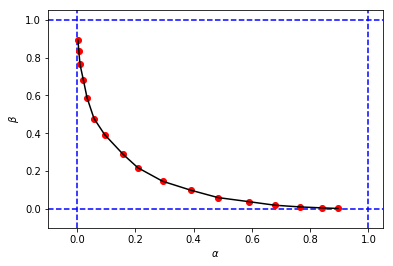

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Reproducing Figure 2.2 from simulation results.
plt.xlabel('$\\alpha$')
plt.ylabel('$\\beta$')
plt.xlim(-0.1, 1.05)
plt.ylim(-0.1, 1.05)
plt.axvline(x=0, color='b', linestyle='--')
plt.axvline(x=1, color='b', linestyle='--')
plt.axhline(y=0, color='b', linestyle='--')
plt.axhline(y=1, color='b', linestyle='--')
figure_2_2 = plt.plot(alphas_simulated, betas_simulated, 'ro', alphas_simulated, betas_simulated, 'k-')

<script type="text/x-mathjax-config">
MathJax.Hub.Register.StartupHook("TeX Jax Ready",function () {
  MathJax.Hub.Insert(MathJax.InputJax.TeX.Definitions.macros,{
    cancel: ["Extension","cancel"],
    bcancel: ["Extension","cancel"],
    xcancel: ["Extension","cancel"],
    cancelto: ["Extension","cancel"]
  });
});
</script>

Apesar do gráfico acima ter ficado muito parecido com o do livro existem algumas diferenças para os valores de $\alpha$ e $\beta$ para o mesmo valor de $c$, por exemplo:
- enquanto que no livro temos $\alpha=0.10$ e $\beta=0.38$ para $c=0.4$
- na simulação acima tivemos $\alpha=0.15$ e $\beta=0.30$ para $c=0.4$.

Então, ao invés de reproduzir a Figura 2.2 através de simulação vamos tentar reproduzi-la analiticamente encontrando as fórmulas para calcular $\alpha$ e $\beta$.

Uma vez que $f_0 \sim \mathcal{N} \left(0,1\right)$ e $f_1 \sim \mathcal{N} \left(0.5,1\right)$ são funções densidade de probabilidade (*probability density functions*) de uma distribuição Normal, então, temos que:

$$
f\left(x \;\middle\vert\; \mu, \sigma^2 \right) = \prod_{i = 1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(x_i-\mu\right)^2}{2\sigma^2}}
$$

Dado que a razão de verossimilhança (*likelihood ratio*) $L(x)$ é dada por

$$
L(x) = \frac{f_1\left(x\right)}{f_0\left(x\right)}
$$

então, temos:

$$
L(x) = \frac{f_1\left(x\;\middle\vert\; \mu_1, \sigma^2\right)}{f_0\left(x\;\middle\vert\; \mu_0, \sigma^2\right)} = \frac{\prod_{i = 1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(x_i-\mu_1\right)^2}{2\sigma^2}}}{\prod_{i = 1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(x_i-\mu_0\right)^2}{2\sigma^2}}}
$$

Logo, realizando algumas simplificações algébricas (como abaixo), teremos:

$$
L(x) = \frac{\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n e^{-\frac{\sum_{i = 1}^{n} \left(x_i-\mu_1\right)^2}{2\sigma^2}}}{\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n e^{-\frac{\sum_{i = 1}^{n} \left(x_i-\mu_0\right)^2}{2\sigma^2}}}
$$

$$
= e^{\frac{-\sum_{i = 1}^{n} \left(x_i-\mu_1\right)^2 + \sum_{i = 1}^{n} \left(x_i-\mu_0\right)^2}{2\sigma^2}}
$$

$$
= e^{\frac{-\sum_{i = 1}^{n} \left(x_i^2 -2x_i\mu_1 + \mu_1^2\right) + \sum_{i = 1}^{n} \left(x_i^2 -2x_i\mu_0 + \mu_0^2\right)}{2\sigma^2}}
$$

$$
= e^{\frac{-\sum_{i = 1}^{n}x_i^2 + 2\mu_1\sum_{i = 1}^{n}x_i - \sum_{i = 1}^{n}\mu_1^2 + \sum_{i = 1}^{n}x_i^2 - 2\mu_0\sum_{i = 1}^{n}x_i + \sum_{i = 1}^{n}\mu_0^2}{2\sigma^2}}
$$

$$
= e^{\frac{2\left(\mu_1-\mu_0\right)\sum_{i = 1}^{n}x_i + n\left(\mu_0^2-\mu_1^2\right)}{2\sigma^2}}
$$

Então, se

$$
t_c(x) = \left\{ \begin{array}{ll} 1\enspace\text{if log } L(x) \ge c\\ 0\enspace\text{if log } L(x) \lt c.\end{array} \right.
$$

para $\text{log } L(x) \ge c$ temos:

$$
\text{log } \left( e^{\frac{2\left(\mu_1-\mu_0\right)\sum_{i = 1}^{n}x_i + n\left(\mu_0^2-\mu_1^2\right)}{2\sigma^2}} \right) \ge c
$$

$$
\frac{2\left(\mu_1-\mu_0\right)\sum_{i = 1}^{n}x_i + n\left(\mu_0^2-\mu_1^2\right)}{2\sigma^2} \ge c
$$

$$
\sum_{i = 1}^{n}x_i \ge \frac{2c\sigma^2 - n\left(\mu_0^2-\mu_1^2\right)}{2\left(\mu_1-\mu_0\right)}
$$

$$
\sum_{i = 1}^{n}x_i \ge \frac{2c\sigma^2}{2\left(\mu_1-\mu_0\right)} - \frac{n\left(\mu_0^2-\mu_1^2\right)}{2\left(\mu_1-\mu_0\right)}
$$

$$
\sum_{i = 1}^{n}x_i \ge \frac{c\sigma^2}{\left(\mu_1-\mu_0\right)} - \frac{n\left(\mu_0^2-\mu_1^2\right)}{2\left(\mu_1-\mu_0\right)}
$$

$$
\sum_{i = 1}^{n}x_i \ge \frac{c\sigma^2}{\left(\mu_1-\mu_0\right)} + \frac{n\left(\mu_1^2-\mu_0^2\right)}{2\left(\mu_1-\mu_0\right)}
$$

$$
\sum_{i = 1}^{n}x_i \ge \frac{c\sigma^2}{\left(\mu_1-\mu_0\right)} + \frac{n\left(\mu_1-\mu_0\right)\left(\mu_1+\mu_0\right)}{2\left(\mu_1-\mu_0\right)}
$$

$$
\sum_{i = 1}^{n}x_i \ge \frac{c\sigma^2}{\left(\mu_1-\mu_0\right)} + \frac{n\left(\mu_1+\mu_0\right)}{2}
$$

$$
\left(\frac{1}{n}\right) \sum_{i = 1}^{n}x_i \ge \left(\frac{1}{n}\right) \left( \frac{c\sigma^2}{\left(\mu_1-\mu_0\right)} + \frac{n\left(\mu_1+\mu_0\right)}{2}\right)
$$

$$
\frac{\sum_{i = 1}^{n}x_i}{n} \ge \frac{c\sigma^2}{n\left(\mu_1-\mu_0\right)} + \frac{\left(\mu_1+\mu_0\right)}{2}
$$

$$
\bar{x} \ge \frac{c\sigma^2}{n\left(\mu_1-\mu_0\right)} + \frac{\left(\mu_1+\mu_0\right)}{2}
$$

$$
\bar{x} \ge k \text{, onde } k = \frac{c\sigma^2}{n\left(\mu_1-\mu_0\right)} + \frac{\left(\mu_1+\mu_0\right)}{2}
$$

Logo, o teste passa a ser:

$$
t_c(x) = \left\{ \begin{array}{ll} 1\enspace\text{if } \bar{x} \ge k\\ 0\enspace\text{if } \bar{x} \lt k.\end{array} \right. \enspace \enspace \text{, onde } k = \frac{c\sigma^2}{n\left(\mu_1-\mu_0\right)} + \frac{\left(\mu_1+\mu_0\right)}{2}
$$

Para calcularmos $\alpha$ e $\beta$, sabemos que:

$$
\alpha = \text{Pr}_{f_0} \{t(x)=1\},
$$
$$
\beta = \text{Pr}_{f_1} \{t(x)=0\}.
$$

então,

$$
\begin{array}{ll} \alpha = \text{Pr}_{f_0} \{\bar{x} \ge k\},\\ \beta = \text{Pr}_{f_1} \{\bar{x} \lt k\}.\end{array} \enspace \enspace \text{ onde } k = \frac{c\sigma^2}{n\left(\mu_1-\mu_0\right)} + \frac{\left(\mu_1+\mu_0\right)}{2}
$$

logo, 

$$
\alpha = \text{Pr}_{f_0} \{\bar{x} \ge k\} = \text{Pr}_{f_0} \{\bar{x} - \mu_0 \ge k - \mu_0\}
$$

pelo Teorema Central do Limite (*Central Limit Theorem - CLT*), sob certas condições ([mais detalhes aqui](https://fmafonseca.github.io/statistical-thinking-data-science/001.teorema-central-do-limite.html)), sabemos que:

$$
\bar{X} \sim \mathcal{N}\left(mean=\mu_{pop}, SE=\frac{\sigma}{\sqrt{n}}\right)
$$

então, dividindo ambos os lados da inequação por $\frac{\sigma}{\sqrt{n}}$ teremos:

$$
\alpha = \text{Pr}_{f_0} \left\{\frac{\bar{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}} \ge \frac{k - \mu_0}{\frac{\sigma}{\sqrt{n}}}\right\}
$$

uma vez que o termo $\frac{\bar{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}}$ representa a distância em desvios padrão (*standard deviations*) da média $\mu_0$, então, podemos interpretar este termo como o escore z (*z score*), logo

$$
\alpha = \text{Pr}_{f_0} \left\{\text{z-score} \ge \frac{k - \mu_0}{\frac{\sigma}{\sqrt{n}}}\right\} \enspace \enspace \text{ onde } k = \frac{c\sigma^2}{n\left(\mu_1-\mu_0\right)} + \frac{\left(\mu_1+\mu_0\right)}{2}
$$

além disto, sabemos que os valores de escore z (*z score*) são distribuídos de acordo com a distribuição z (*z distribution*) que é a distribuição normal padrão, ou seja, $\text{z-score} \sim \mathcal{N}(\mu=0,\sigma=1)$, então

In [14]:
def alpha_calculation(cutoff, m_0, m_1, variance, sample_size):
    c = cutoff
    n = sample_size
    sigma = np.sqrt(variance)
    
    k = (c*variance)/(n*(m_1-m_0)) + (m_1+m_0)/2.0
    
    z_alpha = (k-m_0)/(sigma/np.sqrt(n))
    
    # Pr{z_score >= z_alpha}
    return 1.0 - st.norm(loc=0, scale=1).cdf(z_alpha)

Utilizando o mesmo raciocíncio para $\beta$ temos:

$$
\beta = \text{Pr}_{f_1} \{\bar{x} \lt k\} = \text{Pr}_{f_1} \{\bar{x} - \mu_1 \lt k - \mu_1\}
$$

$$
\beta = \text{Pr}_{f_1} \left\{\frac{\bar{x} - \mu_1}{\frac{\sigma}{\sqrt{n}}} \lt \frac{k - \mu_1}{\frac{\sigma}{\sqrt{n}}}\right\}
$$

$$
\beta = \text{Pr}_{f_1} \left\{\text{z-score} \lt \frac{k - \mu_1}{\frac{\sigma}{\sqrt{n}}}\right\} \enspace \enspace \text{ onde } k = \frac{c\sigma^2}{n\left(\mu_1-\mu_0\right)} + \frac{\left(\mu_1+\mu_0\right)}{2}
$$

In [15]:
def beta_calculation(cutoff, m_0, m_1, variance, sample_size):
    c = cutoff
    n = sample_size
    sigma = np.sqrt(variance)
    
    k = (c*variance)/(n*(m_1-m_0)) + (m_1+m_0)/2.0
    
    z_beta = (k-m_1)/(sigma/np.sqrt(n))
    
    # Pr{z_score < z_beta}
    return st.norm(loc=0, scale=1).cdf(z_beta)

In [16]:
%%time

alphas_calculated = []
betas_calculated = []
for cutoff in cutoffs:
    alpha_ = alpha_calculation(cutoff, 0.0, 0.5, 1.0, sample_size)
    beta_ = beta_calculation(cutoff, 0.0, 0.5, 1.0, sample_size)
    
    alphas_calculated.append(alpha_)
    betas_calculated.append(beta_)

Wall time: 33.9 ms


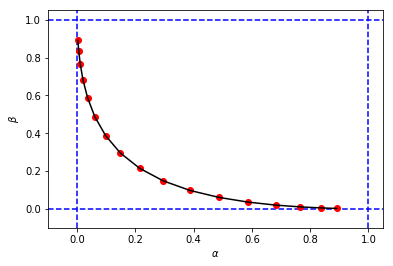

In [17]:
# Reproducing Figure 2.2 from calculation results.
plt.xlabel('$\\alpha$')
plt.ylabel('$\\beta$')
plt.xlim(-0.1, 1.05)
plt.ylim(-0.1, 1.05)
plt.axvline(x=0, color='b', linestyle='--')
plt.axvline(x=1, color='b', linestyle='--')
plt.axhline(y=0, color='b', linestyle='--')
plt.axhline(y=1, color='b', linestyle='--')
figure_2_2 = plt.plot(alphas_calculated, betas_calculated, 'ro', alphas_calculated, betas_calculated, 'k-')

In [18]:
df = pd.DataFrame({
    'cutoff': np.round(cutoffs, decimals=2), 
    'simulated alpha': np.round(alphas_simulated, decimals=2),
    'simulated beta': np.round(betas_simulated, decimals=2),
    'calculated alpha': np.round(alphas_calculated, decimals=2),
    'calculated beta': np.round(betas_calculated, decimals=2)
})
df

,cutoff,simulated alpha,simulated beta,calculated alpha,calculated beta
0,3.2,0.00,0.89,0.00,0.89
1,2.8,0.01,0.84,0.01,0.84
2,2.4,0.01,0.76,0.01,0.77
3,2.0,0.02,0.68,0.02,0.68
4,1.6,0.03,0.59,0.04,0.59
5,1.2,0.06,0.48,0.06,0.49
6,0.8,0.09,0.39,0.10,0.39
7,0.4,0.16,0.29,0.15,0.30
8,0.0,0.21,0.22,0.21,0.21
9,-0.4,0.29,0.15,0.30,0.15


### Dúvida no site do Livro e no Cross Validated

Devido à diferença entre a minha simulação e o livro para os valores de $\alpha$ e $\beta$, postei a seguinte questão no Cross Validated:

https://stats.stackexchange.com/q/383845/231794

Após um tempo sem respostas no site Cross Validated, postei a mesma questão no fórum de discussão do próprio livro e tive a grata surpresa de ser respondido pelo professor **Trevor Hastie** (um dos autores do livro):

https://disqus.com/home/discussion/computeragestatisticalinference/computer_age_statistical_inference_algorithms_evidence_and_data_science/#comment-4257220966

![trevor_hastie_reply](figures/TrevorHastie_Reply_small.jpeg)

Ou seja, de acordo com a resposta do **Trevor Hastie** os valores de $\alpha=0.10$ e $\beta=0.38$ correspondem a um *cutoff* $c=0.75$:

In [19]:
alpha_simulated_c075 = alpha_simulation(0.75, f0_density, f1_density, sample_size, replicates)
beta_simulated_c075 = beta_simulation(0.75, f0_density, f1_density, sample_size, replicates)

alpha_calculated_c075 = alpha_calculation(0.75, 0.0, 0.5, 1.0, sample_size)
beta_calculated_c075 = beta_calculation(0.75, 0.0, 0.5, 1.0, sample_size)

print("Simulated: c=0.75, alpha={0:.2f}, beta={1:.2f}".format(alpha_simulated_c075, beta_simulated_c075))
print("Calculated: c=0.75, alpha={0:.2f}, beta={1:.2f}".format(alpha_calculated_c075, beta_calculated_c075))

Simulated: c=0.75, alpha=0.10, beta=0.37
Calculated: c=0.75, alpha=0.10, beta=0.38


Como as funções `alpha_simulation(.)`, `beta_simulation(.)`, `alpha_calculation(.)` e `beta_calculation(.)` aqui implementadas reproduziram exatamente estes mesmos valores, então, a implementação das mesmas de fato está correta.

Além disso, quando o **Trevor Hastie** diz que ***"..., resulting in a threshold for x of .4"*** ele está se referindo ao $k$ da fórmula abaixo que obtivemos anteriormente ao reproduzir os dados da Figura 2.2 analiticamente.

$$
\bar{x} \ge k \text{, onde } k = \frac{c\sigma^2}{n\left(\mu_1-\mu_0\right)} + \frac{\left(\mu_1+\mu_0\right)}{2}
$$

onde, o teste passa a ser:

$$
t_c(x) = \left\{ \begin{array}{ll} 1\enspace\text{if } \bar{x} \ge k\\ 0\enspace\text{if } \bar{x} \lt k.\end{array} \right. \enspace \enspace \text{, onde } k = \frac{c\sigma^2}{n\left(\mu_1-\mu_0\right)} + \frac{\left(\mu_1+\mu_0\right)}{2}
$$

In [20]:
n = 10
m_0 = 0.0
m_1 = 0.5
variance = 1.0
c = 0.75

k = (c*variance)/(n*(m_1-m_0)) + (m_1+m_0)/2.0
threshold_for_x = k

print("threshold for x (when cutoff c=0.75) = {0:.1f}".format(threshold_for_x))

threshold for x (when cutoff c=0.75) = 0.4


*Referências além do próprio livro:*
 - https://digitalcommons.usu.edu/gradreports/14

<!--NAVIGATION-->
< [Algorithms and Inference](01.01.Algorithms-and-Inference.ipynb) | [Conteúdo](Index.ipynb) | [Bayesian Inference] >

<a href="https://colab.research.google.com/github/fmafonseca/casi/blob/master/notebooks/01.02.Frequentist-Inference.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>